<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# instruction permettant d'afficher toutes les colonnes d'un dataframe

pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
df_web = pd.read_excel("web.xlsx", engine="openpyxl")
df_erp = pd.read_excel("erp.xlsx", engine="openpyxl")
df_liaison = pd.read_excel("liaison.xlsx", engine="openpyxl")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
# Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [ ]:
# Consulter les colonnes
# La nature des données dans chacune des colonnes

print(df_erp.dtypes)

# Le nombre de valeurs présentes dans chacune des colonnes

print(df_erp.count())

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [ ]:
#Afficher les 5 premières lignes de la table

df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [ ]:
# Vérifier si il y a les lignes en doublons dans la colonne product_id
print(df_erp[df_erp['product_id'].duplicated(keep=False)])

# Pas de doublon dans cette colonne

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []


In [ ]:
# Afficher les valeurs distinctes de la colonne stock_status
print(df_erp['stock_status'].unique())

['instock' 'outofstock']


In [ ]:
# À quelle(s) autre(s) colonne(s) les valeurs de stock_status sont-elles liées ?

# On peut se dire que valeurs de stock_status dépendant de stock_quantity. Si stock_quantity = 0, alors outofstock
# Vérifions si notre logique est vraie:

condition = ((df_erp['stock_status'] == 'outofstock') & (df_erp['stock_quantity'] != 0)) | ((df_erp['stock_status'] == 'instock') & (df_erp['stock_quantity'] <= 0))

df_erp[condition].head(20)

# Il y a 4 résultats qui ressortent qui correspondent à 2 cas différents :
# - 1 produit est outofstok alors que stock > 0, et 1 autre produit est instock alors que 0 stock
# - 2 produits sont outofstock parce que le stock_quantity est en fait négatif
# Dans ces deux situations, il ne s'agit pas forcément d'erreurs. Plus de commandes que de stocks, des retours en cours, etc...
# Conclusion : si les statuts correspondent souvent à stock_quantity, ils ne semblent pas directement dépendre de cette colonne

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
4,4039,1,46.0,3,outofstock,23.77
398,4885,1,18.7,0,instock,9.66
449,4973,0,10.0,-10,outofstock,4.96
573,5700,1,44.5,-1,outofstock,22.30


In [ ]:
# Autre méthode de vérification

# Création d'une colonne "stock_status_2
# La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
# si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"

df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0 else 'instock')

print(df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]])

#On retrouve le cas n°1

     product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock  


In [ ]:
# Corriger la ou les données incohérentes

# Verification en utilisant le même code que plus haut pour afficher les problemes


# Mais est-ce vraiment des données incohérentes ? Cela dépend de la logique métier
# Si c'est bien des erreurs il suffit de remplacer les valeurs différentes en stock_status par celles de stock_status_2
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], "stock_status"] = df_erp["stock_status_2"]

df_erp[condition].head(20)


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,instock,23.77,instock
398,4885,1,18.7,0,outofstock,9.66,outofstock
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


In [ ]:
# On supprime la colonne 'stock_status_2' dont on n'a plus besoin

df_erp = df_erp.drop(columns=["stock_status_2"])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

#Afficher le ou les prix non renseignés dans la colonne "price"

prix_manquants = (df_erp['price'].isnull() | df_erp['price'] == 0)

print(f"Nombres d'articles avec un prix non renseigné: {df_erp[prix_manquants].shape[0]}")

Nombres d'articles avec un prix non renseigné: 0


In [ ]:
# Afficher le prix minimum de la colonne "price"
print(df_erp['price'].min())

# Afficher le prix maximum de la colonne "price"
print(df_erp['price'].max())

-20.0
225.0


In [ ]:
# Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)

prix_neg = df_erp['price'] < 0

print(f"Nombres d'articles avec un prix négatif: {df_erp[prix_neg].shape[0]}")

# Un prix négatif, ce n'est pas possible

Nombres d'articles avec un prix négatif: 3


In [ ]:
print(df_erp[df_erp['price'] < 0])

#Sans le signe négatif, cela ressemble à des prix normaux. Retirer le signe ?

#df_erp['price'] = df_erp['price'].abs()

     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price  
151           10.33  
469            4.34  
739            4.61  


In [ ]:
# mettre en null dans l'attente de plus de précisions

df_erp['price'] = df_erp['price'].where(df_erp['price'] >= 0, np.nan)

print(df_erp[df_erp['price'] < 0])

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

# Vérification de la colonne stock quantity
# Afficher la quantité minimum de la colonne "stock_quantity"
print(df_erp['stock_quantity'].min())

# Afficher la quantité maximum de la colonne "stock_quantity"
print(df_erp['stock_quantity'].max())

-10
145


In [ ]:
# Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)

stock_neg = df_erp['stock_quantity'] < 0

print(f"Nombres d'articles avec un stock négatif: {df_erp[stock_neg].shape[0]}")

# Il vaut mieux ne pas les supprimer, c'est peut-être dû à plus de commandes que de stocks. Ces valeurs peuvent être utiles pour créer des alertes

Nombres d'articles avec un stock négatif: 2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
# Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?

print(df_erp['onsale_web'].unique())

# Le nom de la colonne suggère qu'il s'agit de savoir si oui ou non un produit est vendu sur le web, 1 pour oui et 0 pour non

[1 0]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [ ]:
######################
##   prix d'achat   ##
######################

# Vérification de la colonne purchase_price : 
# Afficher le ou les prix non renseignés dans la colonne "purchase_price"

prix_achat_manquants = (df_erp['purchase_price'].isnull() | df_erp['purchase_price'] == 0)

print(f"Nombres d'articles avec un prix non renseigné: {df_erp[prix_achat_manquants].shape[0]}")


Nombres d'articles avec un prix non renseigné: 0


In [ ]:
# Afficher le prix minimum de la colonne "purchase_price"

print(df_erp['purchase_price'].min())

# Afficher le prix maximum de la colonne "purchase_price"

print(df_erp['purchase_price'].max())

2.74
137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [ ]:
# Dimension du dataset
# Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))

# Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [ ]:
# La nature des données dans chacune des colonnes

df_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object


In [ ]:
# Le nombre de valeurs présentes dans chacune des colonnes

print(df_web.count().to_string())

sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
product_type             1429
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430


In [ ]:
# Il y a des colonnes avec seulement des null, en regardant de plus près il semble aussi y avoir des colonnes avec beaucoup de répétitions de 0

df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,NaN,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,NaN,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,NaN,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,NaN,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,NaN,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,NaN,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16295,0,0,0,0.0,14.0,NaN,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,NaN,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,NaN,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15328,0,0,0,0.0,2.0,taxable,NaN,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,NaN,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,NaN,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
print(df_web['virtual'].unique())
print(df_web['downloadable'].unique())
print(df_web['rating_count'].unique())
print(df_web['average_rating'].unique())
print(df_web['post_parent'].unique())
print(df_web['menu_order'].unique())
print(df_web['comment_count'].unique())

[0]
[0]
[0]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]


In [ ]:
# certaines colonnes ne contiennent que des nulls et semblent donc alourdir le dataframe inutilement :

df_web = df_web.drop(columns=["tax_class", "post_content", "post_password", "post_content_filtered", "virtual", "downloadable", "rating_count", "average_rating", "post_parent", "menu_order", "comment_count"])

df_web.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,11862,3.0,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1,16057,5.0,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
2,14692,5.0,taxable,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,16295,14.0,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
4,15328,2.0,taxable,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [ ]:
print("Le tableau comporte maintenant {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte maintenant 18 colonne(s)


In [ ]:
# Visualisation des valeurs de la colonne sku

print(df_web["sku"].head(10))

0    11862
1    16057
2    14692
3    16295
4    15328
5    15471
6    16515
7    16246
8      NaN
9    13572
Name: sku, dtype: object


In [ ]:
# Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
# règle de codification : le sku doit être composé de 5 chiffres, donc on cherche ceux qui ne respectent pas cette règle

print(df_web["sku"].astype(str).str.len().value_counts())

sku
5     1342
3      107
4       56
2        4
7        2
19       2
Name: count, dtype: int64


In [ ]:
# sku contenant des lettres

print(df_web["sku"].str.contains(r'[A-Za-z]', na=False).sum())

2


In [ ]:
# sku contenant des caractères spéciaux

print(df_web["sku"].str.contains(r'\W', na=False).sum())

4


In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les

df_web["sku_non_conforme"] = df_web["sku"].apply(
    lambda x: 1 if (len(str(x)) != 5 or not str(x).isdigit()) else 0
)

In [ ]:
non_conformes = df_web[df_web["sku_non_conforme"] == 1]

non_conformes.count()

# On attendait au moins 171 résultats, et c'est bien ce qu'on trouve

sku                   86
total_sales           88
tax_status            45
post_author           88
post_date             88
post_date_gmt         88
product_type          87
post_title            88
post_excerpt          45
post_status           88
comment_status        88
ping_status           88
post_name             88
post_modified         88
post_modified_gmt     88
guid                  88
post_type             88
post_mime_type        43
sku_non_conforme     171
dtype: int64

In [ ]:
non_conformes

# beaucoup de cas sont des sku nulls (quand on fait le test len, les NaN sont considérés comme des string avec une longueur de 3)

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,sku_non_conforme
8,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1
20,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1
30,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1
33,9636,0.0,taxable,2.0,2018-03-22 10:44:57,2018-03-22 09:44:57,Whisky,Wemyss Malts Blended Malt Scotch Whisky The Hi...,The Hive est un assemblage de malts du Speysid...,publish,closed,closed,whisky-wemyss-the-hive-12-ans,2020-08-19 17:45:03,2020-08-19 15:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1
37,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1
1453,2534,4.0,NaN,2.0,2018-04-14 11:50:29,2018-04-14 09:50:29,Vin,Marcel Windholtz Eau de Vie de Fraise,NaN,publish,closed,closed,marcel-windholtz-eau-de-vie-de-fraise,2020-08-21 15:45:04,2020-08-21 13:45:04,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg,1
1457,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1
1462,798,8.0,taxable,2.0,2018-04-14 12:05:09,2018-04-14 10:05:09,Vin,Marcel Windholtz Eau de Vie de Kirsch d'Alsace...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-vie-de-kirsch-dalsace-...,2020-07-23 10:15:03,2020-07-23 08:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1


In [ ]:
# Identifier les lignes sans code articles

df_web["sku_vide"] = df_web["sku"].apply(
    lambda x: 1 if pd.isnull(x) else 0
    )

In [ ]:
# Pour les codes articles identifiés, réalisez une analyse et définissez l'action à entreprendre

sku_vides = df_web[df_web["sku_vide"] == 1]

sku_vides.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,sku_non_conforme,sku_vide
8,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1,1
20,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1,1
30,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1,1
37,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1,1
41,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1,1


In [ ]:
print("Il y a {} lignes avec un sku non renseigné".format(sku_vides.shape[0]))

Il y a 85 lignes avec un sku non renseigné


In [ ]:
sku_vides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   tax_status         2 non-null      object        
 3   post_author        2 non-null      float64       
 4   post_date          2 non-null      datetime64[ns]
 5   post_date_gmt      2 non-null      datetime64[ns]
 6   product_type       2 non-null      object        
 7   post_title         2 non-null      object        
 8   post_excerpt       2 non-null      object        
 9   post_status        2 non-null      object        
 10  comment_status     2 non-null      object        
 11  ping_status        2 non-null      object        
 12  post_name          2 non-null      object        
 13  post_modified      2 non-null      datetime64[ns]
 14  post_modified_g

In [ ]:
# Pour la majorité de ces sku vides, les autres colonnes sont également non renseignées. Il n'y a que 2 exceptions

# Ainsi il semble judicieux de supprimer les 83 lignes où il n'y a aucun contenu

# Il faut d'abord supprimer les deux colonnes de vérifications

df_web = df_web.drop(columns=["sku_non_conforme", "sku_vide"])

In [ ]:
# Puis on dit de garder seulement les lignes où il n'y a pas que des null ou des 0

df_web = df_web[~(df_web.isna() | (df_web == 0)).all(axis=1)]

In [ ]:
# Donc il devrait y avoir 83 lignes supprimées. 1513 - 83 = 1 430

print("Le tableau comporte désormais {} observation(s) ou article(s)".format(df_web.shape[0]))

Le tableau comporte désormais 1430 observation(s) ou article(s)


In [ ]:
#La clé pour chaque ligne est-elle unique ? ou autrement dit, y a-t-il des doublons ?

doublons_sku =  df_web[df_web['sku'].duplicated(keep=False)]

In [ ]:
doublons_sku["sku"].count()

1428

In [ ]:
# Il y a vraiment beaucoup de doublons sur sku... est-ce normal ?

#Observons plus en détail

doublons_sku = doublons_sku.sort_values(by="sku", key=lambda x: x.astype(str))

doublons_sku.head(10)

# pour chaque sku, il y a deux lignes, où la différence la plus évidente est le contenu dans la colonne guid :
# une version avec une ligne vers une image jpg (quand post type = attachement)
# une version avec un ligne vers ce qui semble plus page produit (quand post type = product)

# Le guid (Globally Unique Identifier) sert à identifier de manière unique un produit notamment quand on réutilise un sku pour un nouveau produit
# Mais il semble bien que ce soit le même produit puisque même date et heure de publication, même nom etc...
# Pourquoi ne pas avoir fait une colonne guid_product et une colonne guid_attachment ?

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
668,10014,10.0,taxable,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,Gin,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1030,10014,10.0,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,Gin,Darnley's London Dry Gin Original,NaN,publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
887,10459,4.0,NaN,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,NaN,publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
748,10459,4.0,taxable,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1317,10775,6.0,NaN,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,NaN,publish,closed,closed,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
802,10775,6.0,taxable,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,Belle bouteille dotée d’une grande complexité ...,publish,closed,closed,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
520,10814,7.0,NaN,2.0,2018-04-17 10:12:40,2018-04-17 08:12:40,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,NaN,publish,closed,closed,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
860,10814,7.0,taxable,2.0,2018-04-17 10:12:40,2018-04-17 08:12:40,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,"La robe est rouge vif. Le nez est très floral,...",publish,closed,closed,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
408,11049,4.0,taxable,2.0,2018-04-13 16:07:49,2018-04-13 14:07:49,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,Superbe robe carmin profond. Un très grand ter...,publish,closed,closed,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1322,11049,4.0,NaN,2.0,2018-04-13 16:07:49,2018-04-13 14:07:49,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,NaN,publish,closed,closed,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


In [ ]:
# la clé primaire est en fait : sku + post_type

# faire un dataframe avec une ligne par sku (on aura plus besoin de post_type)

# attention à ne pas perdre de données (ex : description, guid)

# vérifier doublons une fois que fait

In [ ]:
diff_check = df_web.groupby("sku").nunique() 

# pour chaque sku, regarde le nombre de valeurs distinctes dans chaque colonne. 1 si toutes les valeurs sont identiques, et différent de 1 s'il y a des différences

columns_with_diff = diff_check.columns[diff_check.gt(1).any()]

# gt(1) transforme les valeurs en True si sup à 1, sinon False. any() vérifie s'il y a au moins un True dans les colonnes

print("Colonnes avec différences :", columns_with_diff.tolist())

# A noter que post_excerpt ne sort pas en résultat car les null ne sont pas détectés comme des différences

Colonnes avec différences : ['total_sales', 'guid', 'post_type']


In [ ]:
# Vérifier total_sales. 

sku_total_sales_diff = df_web.groupby("sku")["total_sales"].nunique().loc[lambda x: x > 1].index

print(df_web[df_web["sku"].isin(sku_total_sales_diff)][['sku', 'total_sales']].sort_values("sku"))

        sku  total_sales
523    1366        116.0
548    1366          6.0
114   14561        111.0
1052  14561         11.0
452   14950        122.0
999   14950         22.0
219   15346         22.0
843   15346          2.0


In [ ]:
# Malheureusement pas possible de savoir quel est le bon total_sales quand il est différent.
# A défaut de mieux on peut conserver à chaque fois le plus petit total_sales, mais ce serait mieux d'avoir les vraies données

# df_web.loc[df_web['sku'].isin([1366, 14561, 14950, 15346]), 'total_sales'] = np.nan

df_web.loc[df_web['sku'].isin([1366, 14561, 14950, 15346]), 'total_sales'] = (
    df_web.groupby('sku')['total_sales'].transform('min')
)

# On refait le check

sku_total_sales_diff = df_web.groupby("sku")["total_sales"].nunique().loc[lambda x: x > 1].index

print(df_web[df_web["sku"].isin(sku_total_sales_diff)][['sku', 'total_sales']].sort_values("sku"))

Empty DataFrame
Columns: [sku, total_sales]
Index: []


In [ ]:
# Rappelons nous aussi des deux sku nulls...

df_web[df_web["sku"].isna()]

# Attention les deux sku n'ont pas le même numéro produit (voir colonne guid), donc ce n'est pas le même sku
# On devrait pouvoir retrouver les sku correspondants au numéro produit plus tard en utilisant la table de liaison.

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
1084,NaN,-56.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1087,NaN,-17.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [ ]:
#Comment se fait-il qu'on ait des négatifs au niveau du total_sales ?? Est-ce les seuls cas ?

df_web[df_web["total_sales"] < 0]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
1084,NaN,-56.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1087,NaN,-17.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [ ]:
# Cela ne semble pas avoir de sens d'avoir un aussi grand nombre négatif en ventes.
# On les passe en null à défaut d'avoir les infos

df_web.loc[df_web['sku'].isna(), 'total_sales'] = np.nan

df_web[df_web["total_sales"] < 0]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type


In [ ]:
# Création des nouvelles colonnes guid

df_web['guid_product'] = np.where(df_web['post_type'] == 'product', df_web['guid'], np.nan)
df_web['guid_attachment'] = np.where(df_web['post_type'] == 'attachment', df_web['guid'], np.nan)

df_web.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,guid_product,guid_attachment
0,11862,3.0,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
1,16057,5.0,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
2,14692,5.0,taxable,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN
3,16295,14.0,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
4,15328,2.0,taxable,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN


In [ ]:
# On peut maintenant supprimer les colonnes devenues inutiles : guid, post_type, post_mime_type

df_web = df_web.drop(columns=["guid", "post_type", "post_mime_type"])

df_web.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment
0,11862,3.0,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
1,16057,5.0,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
2,14692,5.0,taxable,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,https://www.bottle-neck.fr/?post_type=product&...,NaN
3,16295,14.0,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,https://www.bottle-neck.fr/wp-content/uploads/...
4,15328,2.0,taxable,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&...,NaN


In [ ]:
# Maintenant il faut fusionner les sku (on devrait arriver à 716 résultats en comptant les deux lignes nulles qui ne doit pas être fusionnées. 1428 / 2 + 2)

# On veut d'abord séparer les lignes avec sku null du reste car ils ne peuvent pas être aggrégés

df_sku_null = df_web[df_web['sku'].isna()]

# Ensuite on groupe par sku en gardant à chaque fois la valeur non nulle de chaque colonne

df_web = df_web.groupby('sku').agg({
    'total_sales' : 'first', # Première valeur non nulle
    'tax_status' : 'first',
    'post_author' : 'first',
    'post_date' : 'first',
    'post_date_gmt' : 'first',
    'product_type' : 'first',
    'post_title' : 'first',
    'post_excerpt': 'first',
    'post_author' : 'first',
    'post_status' : 'first',
    'comment_status' : 'first',
    'ping_status' : 'first',
    'post_name' : 'first',
    'post_modified' : 'first',
    'post_modified_gmt' : 'first',
    'guid_product' : 'first',
    'guid_attachment' : 'first'
}).reset_index()

df_web = pd.concat([df_web, df_sku_null], axis=0).reset_index(drop=True)

df_web.head(20)

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment
0,38,10.0,taxable,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",publish,closed,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
1,41,6.0,taxable,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
2,304,8.0,taxable,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",publish,closed,closed,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
3,523,0.0,taxable,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,publish,closed,closed,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
4,531,8.0,taxable,2.0,2018-07-18 15:58:02,2018-07-18 13:58:02,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,Cuvée bien équilibrée à la fois vive et souple...,publish,closed,closed,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
5,791,1.0,taxable,2.0,2018-04-14 11:54:47,2018-04-14 09:54:47,Vin,Marcel Windholtz Eau de Vie de Baie de Houx,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-vie-de-baie-de-houx,2020-04-21 14:00:04,2020-04-21 12:00:04,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
6,793,1.0,taxable,2.0,2018-04-14 11:52:20,2018-04-14 09:52:20,Vin,Marcel Windholtz Eau de Vie de Coing,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-vie-de-coing,2019-12-23 09:30:54,2019-12-23 08:30:54,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
7,798,8.0,taxable,2.0,2018-04-14 12:05:09,2018-04-14 10:05:09,Vin,Marcel Windholtz Eau de Vie de Kirsch d'Alsace...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-vie-de-kirsch-dalsace-...,2020-07-23 10:15:03,2020-07-23 08:15:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
8,802,5.0,taxable,2.0,2018-04-14 11:48:19,2018-04-14 09:48:19,Vin,Marcel Windholtz Eau de Vie de Marc de Muscat,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-vie-de-marc-de-muscat,2019-02-09 14:00:03,2019-02-09 13:00:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
9,804,3.0,taxable,2.0,2018-04-14 11:59:32,2018-04-14 09:59:32,Vin,Marcel Windholtz Eau de Vie de Mirabelle d'Als...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-mirabelle-dalsace-rese...,2020-07-23 10:15:03,2020-07-23 08:15:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
# Dimension du dataset
# Nombre d'observations

print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))

# Nombre de caractéristiques (autant que pour le fichier erp)
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))


Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [ ]:
df_liaison.head()

,id_web,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039


In [ ]:
# La nature des données dans chacune des colonnes

print(df_liaison.dtypes)

# Le nombre de valeurs présentes dans chacune des colonnes (il y a beaucoup de vides côté id_web)

print(df_liaison.count())

id_web        object
product_id     int64
dtype: object
id_web        734
product_id    825
dtype: int64


In [ ]:
# Les valeurs de la colonne "product_id" sont elles toutes uniques? (oui)

print(df_liaison[df_liaison['product_id'].duplicated(keep=False)].shape[0])

0


In [ ]:
# Les valeurs de la colonne "id_web" sont-elles toutes uniques? (non)

print(df_liaison[df_liaison['id_web'].duplicated(keep=False)].shape[0])

91


In [ ]:
# Avons-nous des articles sans correspondances?

# il y a des null côté id_web

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [ ]:
# Fusion des fichiers df_erp et df_liaison

df_erp_liaison = pd.merge(df_erp, df_liaison, how='outer', on='product_id')

# ajouter indicator = true

# df_erp_liaison = pd.merge(df_erp, df_liaison.iloc[:2], how='outer', on='product_id')


In [ ]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?

df_erp_liaison.shape[0]

825

In [ ]:
df_liaison[~df_liaison['product_id'].isin(df_erp['product_id'])]

,id_web,product_id


In [ ]:
df_erp[~df_erp['product_id'].isin(df_liaison['product_id'])]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [ ]:
# Fusionnez les datasets df_merge et df_web

df_erp_web = pd.merge(df_erp_liaison, df_web, how='left', left_on='id_web', right_on='sku')

In [ ]:
# Avons-nous des lignes sans correspondances?

print(df_erp_web.shape[0])

print(df_erp_web['sku'].notnull().sum())

print(df_erp_web['id_web'].notnull().sum())

# de toute évidence, il y a un problème de correspondance.

916
714
734


In [ ]:
df_erp_web[df_erp_web['sku'].isnull() | df_erp_web['id_web'].isnull()]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment
19,4055,0,86.1,0,outofstock,37.88,NaN,NaN,NaN,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,NaN
20,4055,0,86.1,0,outofstock,37.88,NaN,NaN,NaN,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,NaN
50,4090,0,73.0,0,outofstock,33.79,NaN,NaN,NaN,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,NaN
51,4090,0,73.0,0,outofstock,33.79,NaN,NaN,NaN,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,NaN
52,4092,0,47.0,0,outofstock,25.25,NaN,NaN,NaN,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,NaN
910,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,NaN
911,7204,0,45.0,9,instock,24.18,NaN,NaN,NaN,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,NaN
912,7204,0,45.0,9,instock,24.18,NaN,NaN,NaN,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,NaN


In [ ]:
# On cherche à voir toutes les lignes de df_liaison où les valeurs de id_web ne sont pas dans sku

df_liaison[~df_liaison['id_web'].isin(df_web['sku'])]

# 20 id_web qui ne sont pas dans sku, cela signifie que pour ceux là les infos de df_erp ne pourront pas être mergées correctement avec celles de web

,id_web,product_id
193,13771,4289
236,15065,4568
241,14785,4584
355,12601,4741
391,15154,4864
394,14360,4869
424,15608,4921
425,15586,4922
470,15272,5018
473,15630,5021


In [ ]:
df_web[~df_web['sku'].isin(df_liaison['id_web'])]

# en revanche, tous les sku existent côté table de liaison

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment


In [ ]:
# Pour les cas où id_web ne marche pas bien, peut-être pourrait on utiliser le product_id présent dans la colonne gid ?
# créer une colonne id_product dans la table web

df_web['id_product'] = df_web['guid_product'].str[-4:]

df_web.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product
0,38,10.0,taxable,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",publish,closed,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4729
1,41,6.0,taxable,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4634
2,304,8.0,taxable,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",publish,closed,closed,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4141
3,523,0.0,taxable,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,publish,closed,closed,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5932
4,531,8.0,taxable,2.0,2018-07-18 15:58:02,2018-07-18 13:58:02,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,Cuvée bien équilibrée à la fois vive et souple...,publish,closed,closed,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5047


In [ ]:
df_web['id_product'].count()

716

In [ ]:
# Il faut le changer en int pour que la jointure fonctionne

df_web['id_product'] = df_web['id_product'].astype(int)

In [ ]:
# Vérifions les correspondances entre id_product et product_id

df_liaison[~df_liaison['product_id'].isin(df_web['id_product'])]

# il existe des product_id qui ne sont pas présents dans le fichier web

,id_web,product_id
19,NaN,4055
49,NaN,4090
50,NaN,4092
119,NaN,4195
131,NaN,4209
...,...,...
818,NaN,7200
819,NaN,7201
820,NaN,7203
821,NaN,7204


In [ ]:
df_web[~df_web['id_product'].isin(df_liaison['product_id'])]

# Tous les id_product dans df_web sont présents dans le fichier de liaison

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product


In [ ]:
# Il suffit de faire ça :

df_erp_web = pd.merge(df_erp_liaison, df_web, how='left', 
                     left_on=['id_web', 'product_id'], 
                     right_on=['sku', 'id_product'])

# Car il suffit qu'une seule des deux clés trouvent correspondante pour que la jointure se fasse

In [ ]:
# Vérification que tous les skus provenant de web sont bien présents dans le dataframe final

df_web[~df_web['sku'].isin(df_erp_web['sku'])]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product


In [ ]:
# Vérification que tous les produits sont bien présents dans la dataframe final

df_erp[~df_erp['product_id'].isin(df_erp_web['product_id'])]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [ ]:
# Comparaison onsale_web et sku

df_onsale_incohérents = df_erp_web[~(((df_erp_web['onsale_web'] == 1) & df_erp_web['sku'].notna()) | ((df_erp_web['onsale_web'] == 0) & df_erp_web['sku'].isna()))]

df_onsale_incohérents

 #Seuls les lignes 4200 et 4594 sont problématiques
# Pour 4200, il s'agit d'une incohérence évidente et onsale_web devrait être à 1.
# Pour 4594, on n'est pas sûrs : soit le onsale_web est correct et dans ce cas il manque un sku, soit le onsale_web devrait être à 0

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product
123,4200,0,5.8,33,instock,3.12,16295,16295,14.0,taxable,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,"Rosé très agréable, intense, floral et minéral...",publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4200.0
242,4594,1,144.0,0,outofstock,87.36,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
486,5070,1,84.7,0,outofstock,47.43,NaN,NaN,NaN,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,NaN,5070.0
487,5075,1,43.3,0,outofstock,21.70,NaN,NaN,NaN,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,NaN,5075.0


In [ ]:
# On peut donc corriger le cas du prodit 4200

df_erp_web.loc[df_erp_web['product_id'] == 4200, 'onsale_web'] = 1

df_onsale_incohérents = df_erp_web[~(((df_erp_web['onsale_web'] == 1) & df_erp_web['sku'].notna()) | ((df_erp_web['onsale_web'] == 0) & df_erp_web['sku'].isna()))]

df_onsale_incohérents

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product
242,4594,1,144.0,0,outofstock,87.36,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
486,5070,1,84.7,0,outofstock,47.43,NaN,NaN,NaN,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,NaN,5070.0
487,5075,1,43.3,0,outofstock,21.70,NaN,NaN,NaN,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,NaN,5075.0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas

fig = px.box(df_erp_web, y="price", title="Répartition des prix", labels={"price": "Prix"})

# esthétique
fig.update_layout(
    width=500,  # Réduire la largeur
    height=400,  # Réduire la hauteur
    title_font_size=20,  # Agrandir le titre
    font=dict(size=15),  # Augmenter la taille du texte
    margin=dict(l=40, r=40, t=60, b=40),  # Réduire les marges
)

fig.show()


# ajouter product_id info bulle

In [ ]:
#Répartition des prix par type de produit

fig = px.box(df_erp_web, 
             x="product_type", 
             y="price", 
             title="Répartition des prix par type de produit",
             labels={'product_type': 'Catégorie de produit', "price": "Prix"})

# esthétique
fig.update_layout(
    width=800,  # Réduire la largeur
    height=500,  # Réduire la hauteur
    title_font_size=20,  # Agrandir le titre
    font=dict(size=15),  # Augmenter la taille du texte
    margin=dict(l=40, r=40, t=50, b=40),  # Réduire les marges
)

fig.show()

In [ ]:
# Création d'un graphique de type "pie" pour visualiser la proportion des product_id par type de produit
fig = px.pie(df_erp_web, 
             names='product_type',
             title='Proportion des product_id par type de produit'
            )

# Affichage du graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#Calculer la moyenne du prix

moyenne_prix = df_erp_web["price"].mean()

print(moyenne_prix)

32.350304136253044


In [ ]:
#Calculer l'écart-type du prix

ecart_type_prix = df_erp_web["price"].std()

print(ecart_type_prix)

26.622453099641106


In [ ]:
#Calculer le Z-score

df_erp_web['z_score'] = (df_erp_web['price'] - df_erp_web['price'].mean()) / df_erp_web['price'].std()

df_erp_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product,z_score
0,3847,1,24.2,16,instock,12.88,15298,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,3847.0,-0.306144
1,3849,1,34.3,10,instock,17.54,15296,15296,9.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,3849.0,0.073235
2,3850,1,20.8,0,outofstock,10.64,15300,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,3850.0,-0.433856
3,4032,1,14.1,26,instock,6.92,19814,19814,12.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4032.0,-0.685523
4,4039,1,46.0,3,instock,23.77,19815,19815,3.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4039.0,0.512714


In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?

3 * ecart_type_prix + moyenne_prix

112.21766343517636

In [ ]:
# Nombre d'outliers

df_erp_web[df_erp_web['z_score'] >= 3].shape[0] #shape renvoie le nombre de lignes correspondant au cas où z_score >= 3

17

In [ ]:
# Utiliser le Z-score dans des visuels

fig = px.histogram(df_erp_web, x='z_score', nbins=30, title='Distribution des Z-scores')

# esthétique
fig.update_layout(
    yaxis_title='Nombre de produits',
    width=800,  # Réduire la largeur
    height=500,  # Réduire la hauteur
    title_font_size=20,  # Agrandir le titre
    font=dict(size=15),  # Augmenter la taille du texte
    margin=dict(l=40, r=40, t=50, b=40),  # Réduire les marges
)

fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions

df_erp_web["price"].describe()

count    822.000000
mean      32.350304
std       26.622453
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [ ]:
#Définissez un seuil pour les articles "outliers" en prix

# Calcul de l'IQR (Q3 - Q1)

Q1 = df_erp_web['price'].quantile(0.25)
Q3 = df_erp_web['price'].quantile(0.75)
IQR = Q3 - Q1

#seuil_inf_out = Q1 - 0.5 * IQR
seuil_sup_out = Q3 + 1.5 * IQR

#print("Le seuil pour les outliers inférieurs est", seuil_inf_out)
print("Le seuil pour les outliers supérieurs est", seuil_sup_out)

Le seuil pour les outliers supérieurs est 83.1


In [ ]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

Nb_outliers_prix = df_erp_web['price'].loc[df_erp_web['price'] > seuil_sup_out].count()

print("Il y a", Nb_outliers_prix ,"articles qui sont des outliers supérieurs en prix.")

print("Cela équivaut à", round(Nb_outliers_prix / df_erp_web['price'].count() * 100, 2) ,"% des articles")

Il y a 36 articles qui sont des outliers supérieurs en prix.
Cela équivaut à 4.38 % des articles


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?

df_erp_web.loc[df_erp_web['price'] > seuil_sup_out]

#Les résultats ont souvent des qualifications comme 1er cru, grand cru (voir colonne post_name)... Il est parfaitement courant d'avoir certains alcools de grande qualité à des prix très supérieurs.

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product,z_score
19,4055,0,86.1,0,outofstock,37.88,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,2.018961
66,4115,1,100.0,12,instock,52.70,15382,15382,1.0,taxable,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,Vin,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",publish,closed,closed,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4115.0,2.541077
68,4132,1,88.4,7,instock,44.30,11668,11668,5.0,taxable,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,Vin,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,publish,closed,closed,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4132.0,2.105354
208,4352,1,225.0,0,outofstock,137.81,15940,15940,11.0,taxable,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4352.0,7.236362
214,4359,1,85.6,112,instock,51.93,13853,13853,7.0,taxable,2.0,2018-03-02 11:11:48,2018-03-02 10:11:48,Champagne,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,publish,closed,closed,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4359.0,2.000180
227,4402,1,176.0,11,instock,78.25,3510,3510,3.0,taxable,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,publish,closed,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4402.0,5.395810
228,4404,1,108.5,17,instock,52.22,3507,3507,4.0,taxable,2.0,2018-03-22 11:32:55,2018-03-22 10:32:55,Cognac,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",publish,closed,closed,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4404.0,2.860356
230,4406,1,157.0,12,instock,69.08,7819,7819,4.0,taxable,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,publish,closed,closed,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4406.0,4.682127
231,4407,1,104.0,14,instock,46.71,3509,3509,5.0,taxable,2.0,2018-03-22 11:49:53,2018-03-22 10:49:53,Cognac,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,publish,closed,closed,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4407.0,2.691326
240,4582,1,109.6,18,instock,53.80,12857,12857,1.0,taxable,2.0,2018-04-12 17:56:13,2018-04-12 15:56:13,Vin,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,publish,closed,closed,cha

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [ ]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article

df_erp_web["gross_turnover"] = df_erp_web["price"] * df_erp_web["total_sales"]


#Calculez la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web

total_turnover = df_erp_web["gross_turnover"].sum()

print("Le chiffre d'affaires est", total_turnover)

#faire une version en prenant le total sales maximum

Le chiffre d'affaires est 143680.1


In [ ]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
#Réinitialiser l'index du dataset par un reset_index

df_erp_web = df_erp_web.sort_values(by="gross_turnover", ascending=False).reset_index(drop=True)

#Afficher les 20 premier articles en CA

df_erp_web.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product,z_score,gross_turnover
0,4352,1,225.0,0,outofstock,137.81,15940,15940,11.0,taxable,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4352.0,7.236362,2475.0
1,5892,1,191.3,98,instock,116.06,14983,14983,6.0,taxable,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,publish,closed,closed,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5892.0,5.970513,1147.8
2,4353,1,79.5,127,instock,45.91,12587,12587,14.0,taxable,2.0,2018-03-02 10:37:26,2018-03-02 09:37:26,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,&nbsp;\n\nLe Rosé Grand Cru de la maison Egly-...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-rose,2020-08-22 11:45:02,2020-08-22 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4353.0,1.771050,1113.0
3,5826,1,41.2,34,instock,21.71,15325,15325,20.0,taxable,2.0,2019-03-27 17:59:49,2019-03-27 16:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",publish,closed,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5826.0,0.332415,824.0
4,6212,1,115.0,16,instock,59.42,13996,13996,7.0,taxable,2.0,2019-07-25 09:09:17,2019-07-25 07:09:17,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,"""Il s'agit là de la meilleure partie de l'appe...",publish,closed,closed,domaine-des-comtes-lafon-volnay-1er-cru-santen...,2020-06-16 09:30:16,2020-06-16 07:30:16,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,6212.0,3.104511,805.0
5,5026,1,86.8,101,instock,50.13,13913,13913,9.0,taxable,2.0,2018-07-18 10:46:30,2018-07-18 08:46:30,Champagne,Champagne Agrapart &amp; Fils Minéral Extra Br...,"Légèrement praliné au nez, nerveux, frais, inc...",publish,closed,closed,champagne-agrapart-fils-mineral-extra-brut-bla...,2020-05-11 14:35:02,2020-05-11 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5026.0,2.045255,781.2
6,5008,1,105.0,12,instock,56.42,11602,11602,7.0,taxable,2.0,2018-07-17 10:52:41,2018-07-17 08:52:41,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,"""Il s'agit là de la meilleure partie de l'appe...",publish,closed,closed,domaine-des-comtes-lafon-volnay-1er-cru-santen...,2020-06-23 15:35:02,2020-06-23 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5008.0,2.728888,735.0
7,5767,1,175.0,12,instock,90.42,15185,15185,4.0,taxable,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Vin,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,publish,closed,closed,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5767.0,5.358248,700.0
8,6126,1,135.0,138,instock,80.33,14923,14923,5.0,taxable,2.0,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne,Champagne Gosset Célébris Vintage 2007,Une robe somptueuse a la teinte jaune pâle eti...,publish,closed

In [ ]:
# Graphique en barre des 20 premiers articles avec plotly express

df_erp_web['product_id'] = df_erp_web['product_id'].astype(str)

df_top_20 = df_erp_web.sort_values(by="gross_turnover", ascending=False).reset_index(drop=True).head(20)


fig = px.bar(df_top_20, 
             x='product_id',
             y='gross_turnover',
             labels={'gross_turnover': 'Chiffre d\'affaires  (€)', 'product_id': 'Product ID', 'price': 'Prix', 'total_sales': 'Ventes'},
             title='Top 20 des produits avec le meilleur Chiffre d\'affaires',
             color='product_type',
             category_orders={'product_id': df_top_20['product_id'].tolist()}, #pour conserver l'ordre du top
             text='gross_turnover',
             hover_data={'product_id': True, 'gross_turnover': True, 'price': True, 'total_sales': True})

# Pour que le gross_turnover qui s'affiche sur les barres soit limité à deux décimales
fig.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside'
)

fig.update_layout(
    width=800,
    height=550,
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40),
    legend_title='Categorie'
)

fig.show()

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# le top 20/80 fait référence à une règle qui stipule que dans de nombreux domaines, 80 % des effets sont causés par 20% des causes
# Donc 80% du CA serait causé par 20% des produits.

#Créer une colonne calculant la part du CA de la ligne dans le dataset

df_erp_web['revenue_share'] = (df_erp_web["gross_turnover"] / total_turnover) * 100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

# Astuce : round(10) force Pandas à arrondir chaque valeur à 10 chiffres pour éviter les imprécisions, les ordinateurs ne stockent pas les nombres décimaux de manière parfaitement exacte.
# En faisant ainsi, on obtient en dernier résultat la valeur attendue qui est 100

df_erp_web['cumulative_revenue_share'] = df_erp_web['revenue_share'].cumsum().round(10)

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA

nb_top_20_80 = (df_erp_web['cumulative_revenue_share'] <= 80).sum()

print("Il y a", nb_top_20_80 ,"articles faisant partie du top 20/80")

#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web

print("Cela représente", nb_top_20_80 / df_erp_web["sku"].count() * 100 ,"% du catalogue du site web")

# On fait le count des sku et pas des product_id puisque les product_id sont pas sur le web et qu'on a pas leur total_sales (à confirmer)

# En tout cas il semble que la "loi de Pareto" ne semble pas bien s'appliquer ici.

Il y a 434 articles faisant partie du top 20/80
Cela représente 60.78431372549019 % du catalogue du site web


In [ ]:
# Graphique pie pour montrer le top 20/80 par rapport au total des produits

total_turnover_top_20_80 = df_erp_web.loc[df_erp_web['cumulative_revenue_share'] <= 80, 'gross_turnover'].sum()
total_turnover_other = df_erp_web.loc[df_erp_web['cumulative_revenue_share'] > 80, 'gross_turnover'].sum()
total_articles = df_erp_web["sku"].count()

# Préparer un petit DataFrame pour le pie chart
data = {
    'Catégorie': ['Top 20/80 en CA', 'Autres produits'],
    'Nombre': [nb_top_20_80, total_articles - nb_top_20_80],
    'CA': [total_turnover_top_20_80, total_turnover_other]
}
df_pie = pd.DataFrame(data)

# Créer le pie chart
fig = px.pie(df_pie, 
             names='Catégorie', 
             values='CA', 
             title="Proportion des articles Top 20/80 dans le catalogue",
             color='Catégorie',
             color_discrete_sequence=['#F39C12', '#3498DB'])

fig.update_traces(
    textinfo='percent',  # Afficher les pourcentages à l'intérieur
    hoverinfo='label+percent+value',  # Afficher label, pourcentage et CA au survol
    textposition='inside',  # Placer les pourcentages à l'intérieur
    pull=[0.1, 0],  # Décalage léger pour la première catégorie
    textfont=dict(size=12),
    insidetextorientation='horizontal',  # Orientation du texte à l'intérieur
)

# Ajouter les chiffres d'affaires à l'extérieur, sans interférer avec les pourcentages
fig.update_traces(
    textinfo='label',  # Afficher le label
    texttemplate='%{label}: %{value:.0f}€',  # Affiche CA sans décimales
    textposition='outside',  # Placer les CA à l'extérieur
    textfont=dict(size=12)
)

fig.update_layout(
    width=600,
    height=400,
    title_font_size=20,
    font=dict(size=15),
    margin=dict(l=40, r=40, t=50, b=40)
)


fig.show()




In [ ]:
import plotly.graph_objects as go

# Filtrer les produits avec des valeurs non NaN pour 'price' et 'gross_turnover'
df_filtered = df_erp_web.dropna(subset=['price', 'gross_turnover'])

# Normaliser X et Y sur 100% pour une meilleure lisibilité
df_filtered["cumulative_products"] = (df_filtered.index / len(df_filtered)) * 100

# Créer le graphique
fig = go.Figure()

# Courbe de Lorenz
fig.add_trace(go.Scatter(
    x=df_filtered["cumulative_products"], 
    y=df_filtered["cumulative_revenue_share"], 
    mode='lines', 
    name="Courbe de Lorenz",
    line=dict(color="#3498DB", width=3)  # Ligne bleue
))

# Mise en page
fig.update_layout(
    title="Courbe de Lorenz - Top 20/80 CA",
    xaxis_title="Part cumulative des produits (%)",
    yaxis_title="Part cumulative du CA (%)",
    width=900, height=600,
    xaxis=dict(tickmode='array', tickvals=[0, 20, 40, 60, 80, 100], range=[0, 100]),
    yaxis=dict(tickmode='array', tickvals=[0, 20, 40, 60, 80, 100], range=[0, 100]),
    template="plotly_white",
    showlegend=False
    )


fig.show()


C:\Users\Morgi\AppData\Local\Temp\ipykernel_4956\2052099922.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
#Réinitialiser l'index du dataset par un reset_index

df_erp_web = df_erp_web.sort_values(by="total_sales", ascending=False).reset_index(drop=True)

#Afficher les 20 premier articles en quantité

df_erp_web.head(20)



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product,z_score,gross_turnover,revenue_share,cumulative_revenue_share
0,4867,1,9.9,121,instock,4.86,16148,16148,36.0,taxable,2.0,2018-05-03 13:20:05,2018-05-03 11:20:05,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,"<div>\n\nUn rosé minéral, fruité et d’une gran...",publish,closed,closed,chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,2020-08-27 09:30:15,2020-08-27 07:30:15,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4867.0,-0.843285,356.4,0.248051,22.799330
1,4203,1,9.9,74,instock,5.01,15415,15415,27.0,taxable,2.0,2018-02-15 14:33:42,2018-02-15 13:33:42,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,Vin de gourmandise à boire sur la fraîcheur po...,publish,closed,closed,mas-laval-igp-pays-herault-pampres-blanc-2018,2020-07-11 16:45:03,2020-07-11 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4203.0,-0.843285,267.3,0.186038,40.239045
2,4275,1,14.9,62,instock,7.78,14864,14864,24.0,taxable,2.0,2018-02-27 13:33:54,2018-02-27 12:33:54,Vin,I Fabbri Chianti Classico Lamole 2017,Un nez typique de petits fruits rouges. Une bo...,publish,closed,closed,i-fabbri-chianti-classico-lamole-2017,2020-08-22 14:35:02,2020-08-22 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4275.0,-0.655473,357.6,0.248886,21.557543
3,4726,1,12.7,0,outofstock,6.82,14950,14950,22.0,taxable,2.0,2018-04-18 11:53:51,2018-04-18 09:53:51,Vin,François Baur Pinot Noir Schlittweg 2017,"Un éclat de fruits, de la souplesse, de la ron...",publish,closed,closed,francois-baur-pinot-noir-schlittweg-2017,2020-05-06 11:35:01,2020-05-06 09:35:01,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4726.0,-0.738110,279.4,0.194460,36.807324
4,4647,1,28.5,45,instock,14.14,16525,16525,22.0,taxable,2.0,2018-04-17 09:28:58,2018-04-17 07:28:58,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,"Sur ce sol très calcaire, la Croix Boissée dél...",publish,closed,closed,bernard-baudry-chinon-rouge-croix-boissee-2017,2020-07-31 09:31:39,2020-07-31 07:31:39,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4647.0,-0.144626,627.0,0.436386,8.224243
5,5826,1,41.2,34,instock,21.71,15325,15325,20.0,taxable,2.0,2019-03-27 17:59:49,2019-03-27 16:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",publish,closed,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5826.0,0.332415,824.0,0.573496,3.869569
6,6129,1,5.2,68,instock,2.74,14570,14570,20.0,taxable,2.0,2019-06-28 18:01:06,2019-06-28 16:01:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,Nez Séduisant et puissant. Bouquet de fleurs j...,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,6129.0,-1.019827,104.0,0.072383,95.125073
7,4220,1,11.6,48,instock,5.75,15758,15758,18.0,taxable,2.0,2018-02-16 10:54:27,2018-02-16 09:54:27,Vin,Xavier Frissant Touraine Amboise Chenin Les Pi...,"Un Touraine Amboise fin et élégant, un joli ch...",publish,closed,closed,frissant-chenin-pierres-2018,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4220.0,-0.779429,208.8,0.145323,57.900746
8,5803,1,17.1,47,instock,9.19,13572,13572,17.0,taxable,2.0,2019-03-19 11:33:3

In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express

df_top_20_ts = df_erp_web.sort_values(by="total_sales", ascending=False).reset_index(drop=True).head(20)


fig = px.bar(df_top_20_ts, 
             x='product_id',
             y='total_sales',
             labels={'total_sales': 'Total Sales', 'product_id': 'Product ID'},
             title='Top 20 des produits avec le plus de ventes',
             text='total_sales',
             hover_data={'product_id': True, 'gross_turnover': True, 'price': True, 'total_sales': True, 'product_type': True})

fig.update_layout(
    width=800,
    height=550,
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

In [ ]:
#############################
# Calculer le 20 / 80 en total sales #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset

df_erp_web['sales_share'] = (df_erp_web["total_sales"] / df_erp_web["total_sales"].sum()) * 100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_erp_web['cumulative_sales_share'] = df_erp_web['sales_share'].cumsum().round(10)

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

nb_top_20_80_ts = (df_erp_web['cumulative_sales_share'] <= 80).sum()

print("Il y a", nb_top_20_80_ts ,"articles faisant partie du top 20/80 des ventes")

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

print("Cela représente", nb_top_20_80_ts / df_erp_web["sku"].count() * 100 ,"% du catalogue du site web")


Il y a 433 articles faisant partie du top 20/80 des ventes
Cela représente 60.64425770308123 % du catalogue du site web


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [ ]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Création de la colonne Rotation de stock

# La rotation de stock mesure si le stock s'écoule vite ou lentement
# Le ratio de rotation de stocks se calcule du COGS / moyenne des stocks. Il semblerait que stock_quantity corresponde au stock final puisque il est lié à stock_status
# Pour calculer la moyenne il faut faire stock initial + stock final / 2, mais nous ne connaissons pas le stock initial
# Il faudrait faire stock final + total_sales pour avoir l'initial

df_erp_web['initial_stock'] = df_erp_web['total_sales'] + df_erp_web['stock_quantity']

# On cacule d'abord le COGS = coût des marchandises vendues. Sert à savoir combien on a payé pour renouver les stocks

# Calcul du COGS
df_erp_web['COGS'] = df_erp_web['total_sales'] * df_erp_web['purchase_price']

# Calcul de la rotation de stock
df_erp_web['stock_turnover'] = np.where(df_erp_web['initial_stock'] > 0, df_erp_web['COGS'] / ((df_erp_web['stock_quantity'] + df_erp_web['initial_stock']) / 2), np.nan)

df_erp_web[["product_id","stock_quantity","purchase_price","total_sales","initial_stock","COGS","stock_turnover"]]

# Rotation de stock élevée si > 5 . Cela signifie que le stock s'écoule vite et qu'il n'y a pas beaucoup de stock en exécédent, ça peut être positif comme négatif.
# Moyen entre 2 et 5
# Faible en dessous de 2. Indique que les produits se vendent lentement.

,product_id,stock_quantity,purchase_price,total_sales,initial_stock,COGS,stock_turnover
0,4867,121,4.86,36.0,157.0,174.96,1.258705
1,4203,74,5.01,27.0,101.0,135.27,1.545943
2,4275,62,7.78,24.0,86.0,186.72,2.523243
3,4726,0,6.82,22.0,22.0,150.04,13.640000
4,4647,45,14.14,22.0,67.0,311.08,5.555000
...,...,...,...,...,...,...,...
820,7200,6,15.54,NaN,NaN,NaN,NaN
821,7201,18,16.02,NaN,NaN,NaN,NaN
822,7203,30,23.48,NaN,NaN,NaN,NaN
823,7204,9,24.18,NaN,NaN,NaN,NaN


In [ ]:
#Remplacement des "inf" par 0

#check s'il y a des infinis
df_erp_web[df_erp_web['stock_turnover'].apply(np.isinf)]

#Remplacement
df_erp_web.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge

# Si un produit a 6 mois de stock par exemple, cela signifie que le stock actuel du produit serait suffisant pour couvrir les ventes pendant 6 mois
# Mois de stock = 12 / stock turnover

df_erp_web['months_of_stock'] = 12 / df_erp_web['stock_turnover']

df_erp_web['months_of_stock'] = df_erp_web['months_of_stock'].replace(np.inf, 0)

df_erp_web = df_erp_web.sort_values(by="months_of_stock", ascending=False).reset_index(drop=True)

df_erp_web

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product,z_score,gross_turnover,revenue_share,cumulative_revenue_share,sales_share,cumulative_sales_share,initial_stock,COGS,stock_turnover,months_of_stock
0,6129,1,5.2,68,instock,2.74,14570,14570,20.0,taxable,2.0,2019-06-28 18:01:06,2019-06-28 16:01:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,Nez Séduisant et puissant. Bouquet de fleurs j...,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,6129.0,-1.019827,104.0,0.072383,95.125073,0.347766,2.973396,88.0,54.80,0.702564,17.080292
1,5779,1,5.8,30,instock,2.88,16213,16213,9.0,taxable,2.0,2019-03-15 10:24:21,2019-03-15 09:24:21,Vin,Maurel Pays d'Oc Syrah 2019,<div>Une Syrah fraîche et gouleyante. Une très...,publish,closed,closed,maurel-pays-d-oc-syrah-2019,2020-08-27 18:55:03,2020-08-27 16:55:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5779.0,-0.997290,52.2,0.036331,99.876670,0.156495,60.841593,39.0,25.92,0.751304,15.972222
2,4174,1,5.7,43,instock,2.92,16209,16209,13.0,taxable,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Vin,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4174.0,-1.001046,74.1,0.051573,99.526935,0.226048,14.432273,56.0,37.96,0.766869,15.648051
3,4173,1,5.7,49,instock,2.97,16211,16211,15.0,taxable,2.0,2018-02-14 17:10:39,2018-02-14 16:10:39,Vin,Maurel Pays d'Oc Chenin-Colombard 2019,Ce vin d'une grande fraîcheur est élaboré à pa...,publish,closed,closed,maurel-pays-doc-chenin-colombard-2019,2020-08-07 17:35:03,2020-08-07 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4173.0,-1.001046,85.5,0.059507,98.594934,0.260824,7.946444,64.0,44.55,0.788496,15.218855
4,5777,1,5.7,51,instock,3.03,14338,14338,16.0,taxable,2.0,2019-03-15 10:13:30,2019-03-15 09:13:30,Vin,Maurel Pays d'Oc Cabernet-Sauvignon 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,maurel-pays-d-oc-cabernet-sauvignon-2017,2020-03-11 09:30:06,2020-03-11 08:30:06,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,5777.0,-1.001046,91.2,0.063474,97.612822,0.278212,4.729612,67.0,48.48,0.821695,14.603960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7200,0,31.0,6,instock,15.54,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,-0.050721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7201,0,31.0,18,instock,16.02,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,-0.050721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0.475151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,7204,0,45.0,9,instock,24.18,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0.475151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_erp_web['months_of_stock'].describe()

count    692.000000
mean       3.866214
std        3.061420
min        0.000000
25%        1.120045
50%        3.395193
75%        5.500041
max       17.080292
Name: months_of_stock, dtype: float64

In [ ]:
df_erp_web['months_of_stock'].mean()

3.8662136574399186

In [ ]:
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

df_flop_20_stock = df_erp_web.sort_values(by="months_of_stock", ascending=False).reset_index(drop=True).head(20)

fig = px.bar(df_flop_20_stock, 
             x='product_id',
             y='months_of_stock',
             labels={'months_of_stock': 'Mois de stock', 'product_id': 'Product ID'},
             title='Flop 20 des produits avec le plus de mois de stock',
             text='months_of_stock',
             color='product_type',
             category_orders={'product_id': df_flop_20_stock['product_id'].tolist()},
             hover_data={'product_type': True, 'total_sales': True, 'price': True},
             height=600)

fig.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside'
)

fig.update_layout(
    width=800,
    height=550,
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40),
    legend_title="Catégorie"
)

fig.show()

In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros

df_erp_web['stock_valuation'] = df_erp_web['stock_quantity'] * df_erp_web['purchase_price']

#Calculer la somme de la colonne "Valorisation_stock_euros"

stock_valuation = df_erp_web['stock_valuation'].sum()

stock_valuation

298555.76

In [ ]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity

stock_quantity = df_erp_web['stock_quantity'].sum()

stock_quantity

17811

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [ ]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT

df_erp_web['price_HT'] = df_erp_web['price'] * 0.8


In [ ]:
#Création de la colonne Taux de marge

df_erp_web['margin'] = df_erp_web['price_HT'] - df_erp_web['purchase_price']

df_erp_web['margin_rate'] = df_erp_web['margin'] / df_erp_web['purchase_price']

#Afficher le prix minimum de la colonne "taux_marge"

print("Le plus petit taux de marge est", df_erp_web['margin_rate'].min())

#Afficher le prix maximum de la colonne "taux_marge"

print("Le plus petit taux de marge est", df_erp_web['margin_rate'].max())

Le plus petit taux de marge est -0.8693856479091377
Le plus petit taux de marge est 0.8375597206909224


In [ ]:
#affichage de la ligne avec un taux de marge inférieur à 0

df_erp_web.loc[df_erp_web['margin_rate'] < 0]

# On a 4 produits avec un selling price inférieur au prix d'achat

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid_product,guid_attachment,id_product,z_score,gross_turnover,revenue_share,cumulative_revenue_share,sales_share,cumulative_sales_share,initial_stock,COGS,stock_turnover,months_of_stock,stock_valuation,price_HT,margin,margin_rate
691,4355,1,12.65,97,instock,77.48,12589,12589,0.0,taxable,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...,4355.0,-0.739988,0.0,0.0,100.0,0.0,100.0,97.0,0.0,0.0,0.0,7515.56,10.12,-67.36,-0.869386
741,4864,0,8.30,0,outofstock,9.99,15154,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,-0.903384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,6.64,-3.35,-0.335335
769,6324,0,92.00,18,instock,99.00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,2.240578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1782.00,73.60,-25.40,-0.256566
819,7196,0,31.00,55,instock,31.20,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,-0.050721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1716.00,24.80,-6.40,-0.205128


In [ ]:
#création d'un dataframe avec le taux de marge absolu
# Il vaudrait mieux passer les taux de marge négatifs en null pour réduire leur impact sur le graphique

df_erp_web_2 = df_erp_web.copy()

df_erp_web_2['margin_rate'] = df_erp_web_2['margin_rate'].where(df_erp_web['margin_rate'] > 0, np.nan)

# Afficher le prix minimum de la colonne "taux_marge" hors taux de marge négatifs

print(df_erp_web_2['margin_rate'].min())


0.243179122182681


In [ ]:
#création d'un dataframe avec le taux de marge moyen par type de produit

df_margin_product_type = df_erp_web_2.groupby('product_type')['margin_rate'].agg('mean').reset_index()

df_margin_product_type.head()

,product_type,margin_rate
0,Autre,0.503759
1,Champagne,0.343564
2,Cognac,0.750235
3,Gin,0.678322
4,Huile d'olive,0.280545


In [ ]:
#Affichage dans un graphique du taux de marge par type de produit

fig = px.bar(df_margin_product_type, 
             x='margin_rate',
             y='product_type',
             labels={'product_type': 'Type de produit', 'margin_rate': 'Taux de marge moyen (%)'},
             title='Taux de marge moyen par type de produit')

# esthétique
fig.update_layout(
    width=800,  # Réduire la largeur
    height=500,  # Réduire la hauteur
    title_font_size=20,  # Agrandir le titre
    font=dict(size=15),  # Augmenter la taille du texte
    margin=dict(l=40, r=40, t=50, b=40),  # Réduire les marges
)

fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [ ]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn

import seaborn as sns

import matplotlib.pyplot as plt

<Axes: >

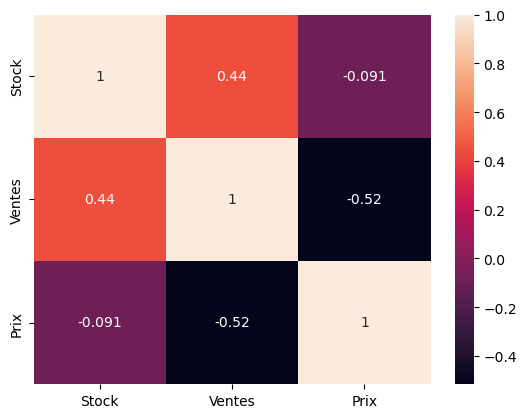

In [ ]:
#Création d'un heatmap de correlation avec les variables stock, sales et price

df_corr = df_erp_web[['stock_quantity', 'total_sales', 'price']].corr()

df_corr = df_corr.rename(columns={
    "stock_quantity": "Stock",
    "total_sales": "Ventes",
    "price": "Prix"
}, index={
    "stock_quantity": "Stock",
    "total_sales": "Ventes",
    "price": "Prix"
})

sns.heatmap(df_corr, annot=True)

# Corrélation de 1 signifie corrélation positive forte
# Corrélation de - 1 signifie corrélation négative forte (quand l'un augmente, l'autre baisse)

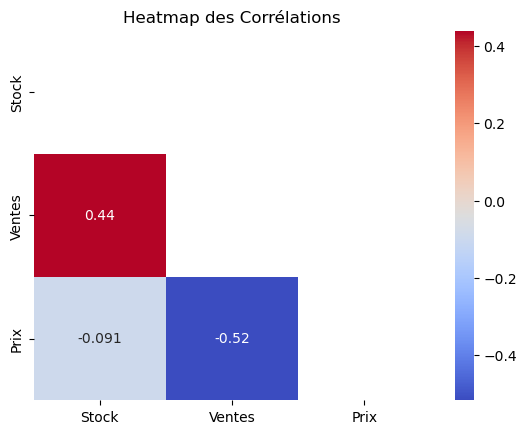

In [ ]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, mask=mask, cmap="coolwarm", annot=True)
plt.title("Heatmap des Corrélations")
plt.show()

In [ ]:
#Que peut-on conclure des correlations ?

# Corrélation de 1 signifie corrélation positive forte
# Corrélation de - 1 signifie corrélation négative forte (quand l'un augmente, l'autre baisse)

# Interprétation (attention : corrélation ne veut pas forcément dire causalité)
# Price et total sales : -0,52 ce qui suppose que quand les prix sont hauts, les ventes sont plus faibles
# Price et stock quantity : -0,091 corrélation très faible
# Total sales et stock quantity : 0,44 suppose que quand les stocks sont hauts, les ventes aussi sont hautes, mais ce n'est pas une grande corrélation.
# Cela signifie qu'il peut y avoir des produits avec beaucoup de stock mais avec peu de ventes par exemple, ce qui indique une gestion peu optimale. Ou alors des ruptures sur des produits très vendus
# Faire plus de visuels pour investiguer !

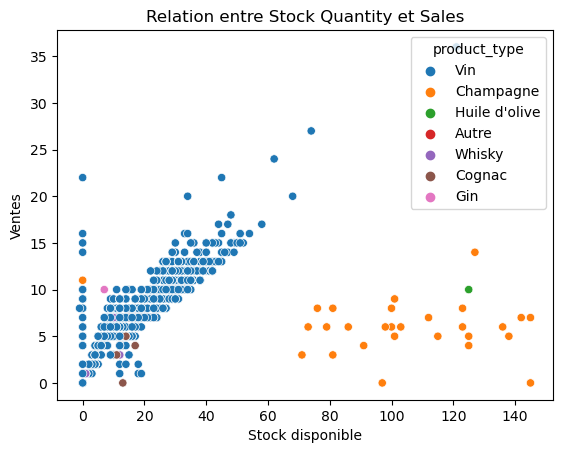

In [ ]:
sns.scatterplot(x=df_erp_web["stock_quantity"],
                y=df_erp_web["total_sales"],
                hue=df_erp_web["product_type"])
plt.title("Relation entre Stock Quantity et Sales")
plt.xlabel("Stock disponible")
plt.ylabel("Ventes")
plt.show()

c:\Users\Morgi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



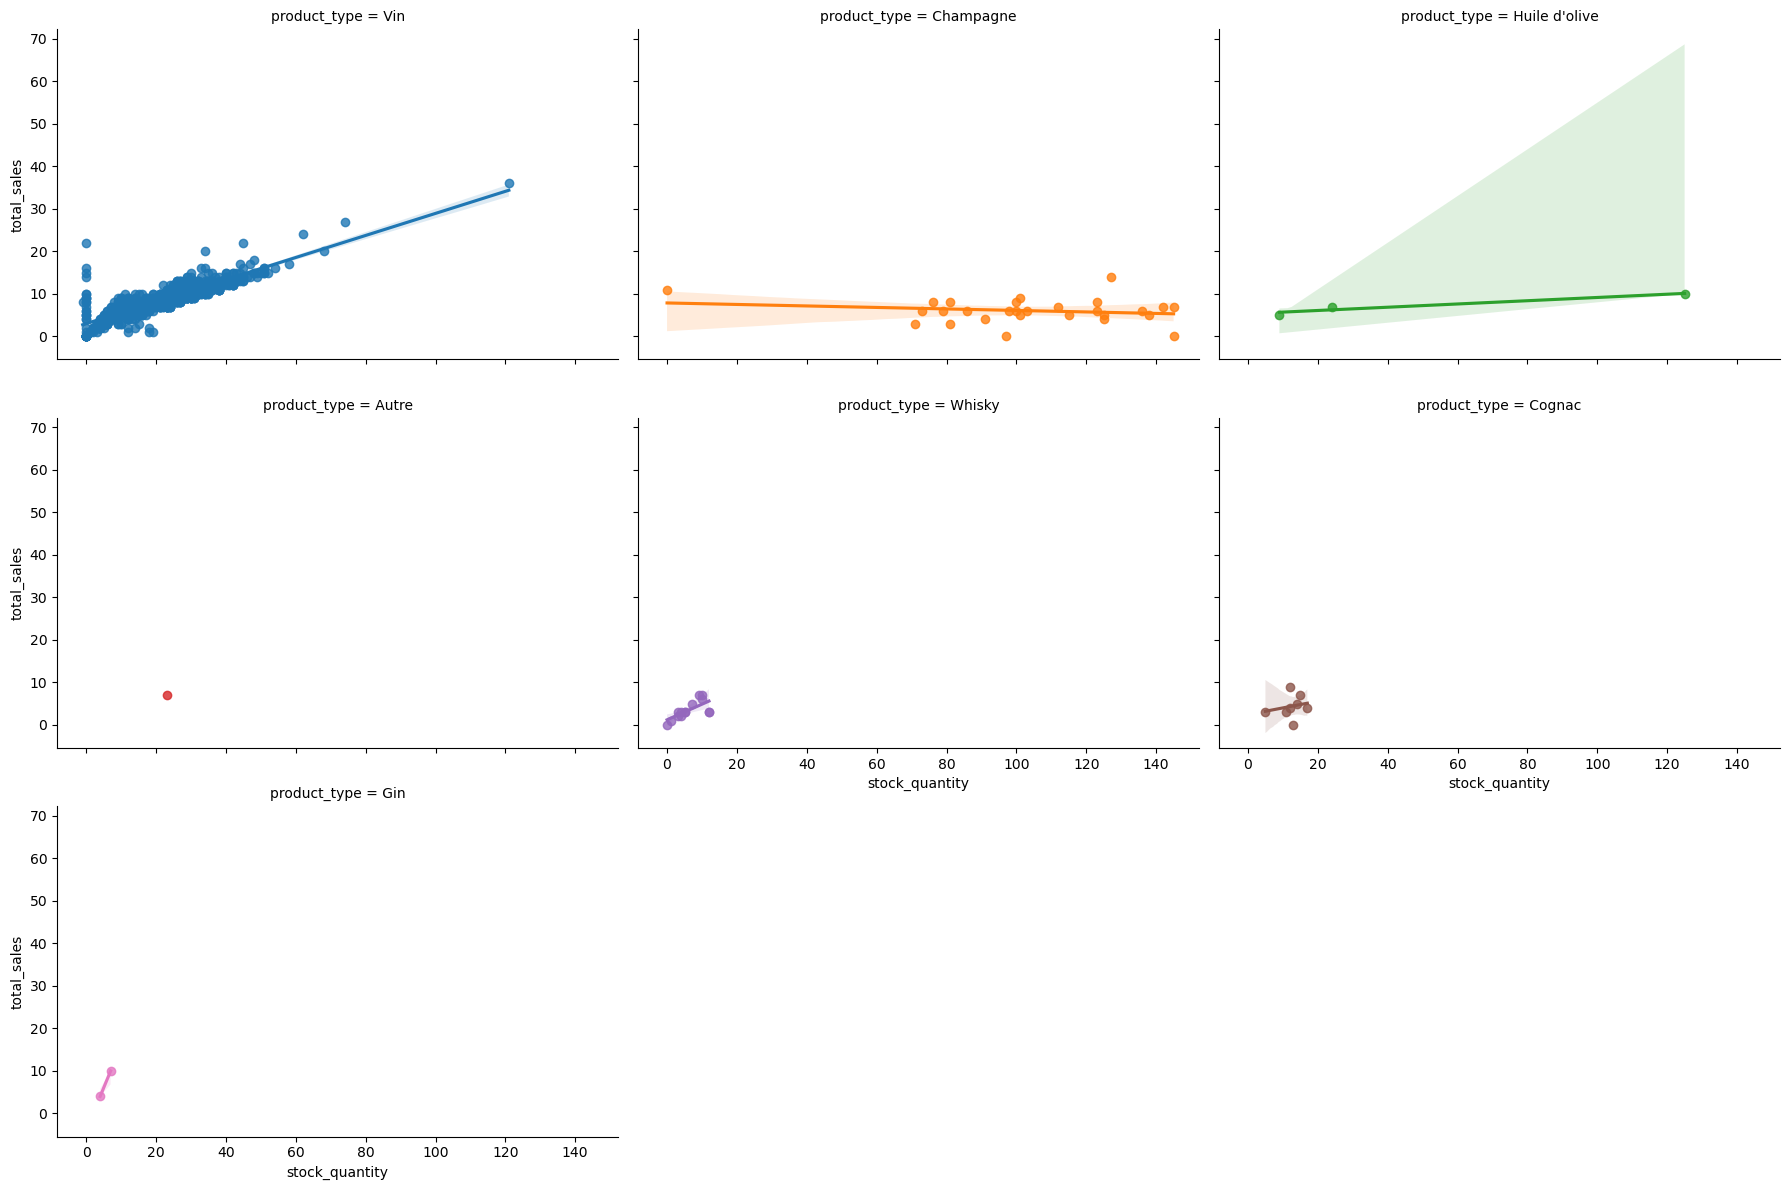

In [ ]:
sns.lmplot(x="stock_quantity", y="total_sales", hue="product_type", col="product_type", data=df_erp_web, col_wrap=3, height=4, aspect=1.5)
plt.show()

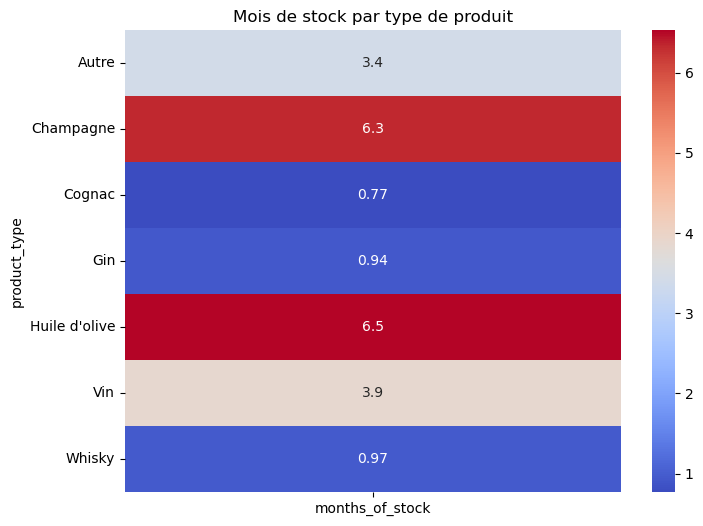

In [ ]:
pivot_table = df_erp_web.pivot_table(values="months_of_stock", index="product_type")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True)
plt.title("Mois de stock par type de produit")
plt.show()

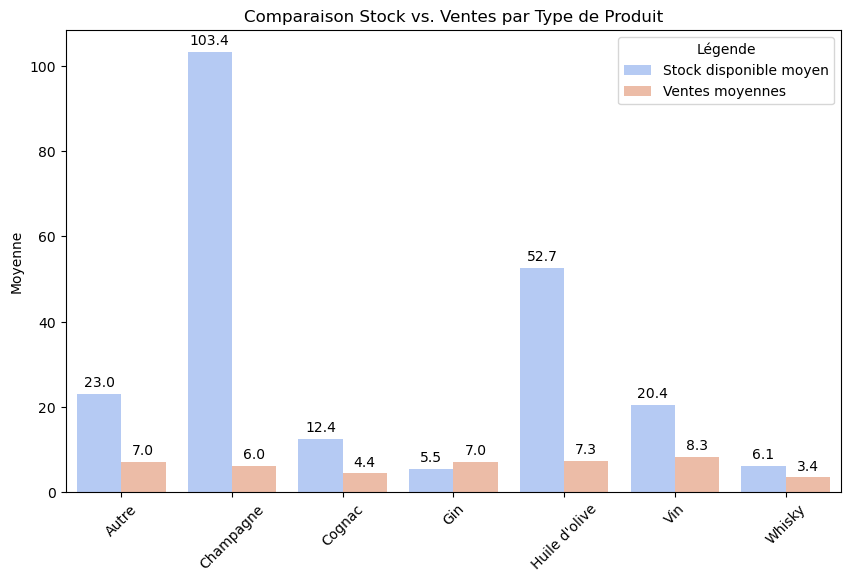

In [ ]:
# Calcul des moyennes par type de produit
df_stock_sales = df_erp_web.groupby("product_type").agg(
    avg_stock=("stock_quantity", "mean"),
    avg_sales=("total_sales", "mean")
).reset_index()

# Transformation pour Seaborn
df_stock_sales = df_stock_sales.melt(id_vars="product_type", var_name="Metric", value_name="Value")

# Création du barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="product_type", y="Value", hue="Metric", data=df_stock_sales, palette="coolwarm")
ax.set(xlabel="")

# Ajouter les valeurs au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, color="black", padding=3)

# Personnalisation
plt.xticks(rotation=45)
plt.ylabel("Moyenne")
plt.title("Comparaison Stock vs. Ventes par Type de Produit")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title="Légende", labels=["Stock disponible moyen", "Ventes moyennes"])
plt.show()

# On voit que sur le champagne par exemple les stocks disponibles sont très élevés en comparaison des ventes. Peut s'expliquer par la saisonnalité.
# Sur le gin au contraire il y a un petit peu plus de ventes totales que de stock disponible actuellement, mais on a pas assez d'infos pour estimer si c'est un problème

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
df_erp_web.to_excel("erp_web.xlsx", index=False)